<a href="https://colab.research.google.com/github/PhilNguyenN/CorrelationFilter/blob/master/CorrelationFilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
from google.colab.patches import cv2_imshow
import zipfile
import io
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import dot
from numpy.linalg import norm

!pip install ipython-autotime
%load_ext autotime

def calculateOR(gt_tl,gt_br,bb_tl,bb_br):
  # 8 points
  widthIntersection = np.maximum(0,np.minimum(gt_br[0],bb_br[0])-np.maximum(gt_tl[0],bb_tl[0]))
  # print(widthIntersection)
  heighIntersection = np.maximum(0,np.minimum(gt_br[1],bb_br[1])-np.maximum(gt_tl[1],bb_tl[1]))
  # print(heighIntersection)
  intersectionArea = widthIntersection*heighIntersection
  groundTruthArea = (gt_br[0]-gt_tl[0])*(gt_br[1]-gt_tl[1])
  bboxArea = (bb_br[0]-bb_tl[0])*(bb_br[1]-bb_tl[1])
  return intersectionArea*100/(groundTruthArea+bboxArea-intersectionArea)

In [ ]:
data = zipfile.ZipFile("/content/Girl.zip", 'r')
data.extractall()
data = zipfile.ZipFile("/content/Dog1.zip", 'r')
data.extractall()
data = zipfile.ZipFile("/content/Liquor.zip", 'r')
data.extractall()
data = zipfile.ZipFile("/content/Freeman4.zip", 'r')
data.extractall()
data = zipfile.ZipFile("/content/FaceOcc2.zip", 'r')
data.extractall()

GIRL Sequences


In [ ]:
# Initial frame and Gtruth
gt = np.loadtxt("/content/Girl/groundtruth_rect.txt",dtype=[('f0',int),('f1',int),('f2',int),('f3',int)])
pictureSequences = os.listdir('/content/Girl/img')
url_1= "/content/Girl/img/0001.jpg" 
firstFrame = cv2.imread(url_1)
width,heigh,_ = firstFrame.shape

# Recorded video
res=(heigh,width) #video resolution
fourcc = cv2.VideoWriter_fourcc(*'MP4V') #codec
video = cv2.VideoWriter('TrackingGirl.mp4', fourcc, 20.0, res)

imgCrop_ini = firstFrame[int(gt[0][1]):int(gt[0][1] + gt[0][3]), int(gt[0][0]):int(gt[0][0] + gt[0][2])]
h,w,channels = imgCrop_ini.shape # Measure heigh + width of croped 1st frame to find the 1st BB

# print(imgCrop_ini.reshape(-1).shape)
# cv2_imshow(imgCrop_ini)
# cv2_imshowAsd

imgCrop = imgCrop_ini
imgCrop = cv2.cvtColor(imgCrop,cv2.COLOR_BGR2GRAY)
boxedImage = []
i = 0 
OR_girl = np.array([])
cosine_collect = np.array([])

for each_image in sorted(pictureSequences):
  # Loading the processing images started from the 2nd file
  full_path = "/content/Girl/img/" + each_image
  processingImage = cv2.imread(full_path)
  processingImage = cv2.cvtColor(processingImage,cv2.COLOR_BGR2GRAY)
  # cv2_imshow(processingImage)
  # Find correlation bw the previous image and current one
  findCorrelation = cv2.matchTemplate(processingImage,imgCrop,cv2.TM_CCOEFF_NORMED)
  promissingLocation = np.where(findCorrelation >= np.max(findCorrelation))
  h,w = imgCrop.shape

  pt = promissingLocation[::-1]
  # print(pt)
  temp = np.array([pt,(pt[0]+w,pt[1]+h)])
  # print(temp)
  boxedImage = cv2.imread(full_path)
  # Correlation Coefficient Tracking (Green)/(Blue is without OR)
  boxedImage = cv2.rectangle(boxedImage,pt,(pt[0]+w,pt[1]+h),(0,255,0),1)
  # Ground Truth (Yellow)
  boxedImage = cv2.rectangle(boxedImage,(gt[i][0],gt[i][1]),(gt[i][0] + gt[i][2],gt[i][1]+gt[i][3]),(0,255,255),1)
  # Calculate overlap region
  matchingRatio = calculateOR((gt[i][0],gt[i][1]),(gt[i][0] + gt[i][2],gt[i][1]+gt[i][3]),pt,(pt[0]+w,pt[1]+h))
  # print(matchingRatio)
  OR_girl = np.append(OR_girl,matchingRatio)
  # make video
  video.write(boxedImage)
  
  processingImage = cv2.imread(full_path) #Reloading color images

  # Crop the image for the next processing loop
  imgCrop = processingImage[int(temp[0][1]):int(temp[1][1]), int(temp[0][0]):int(temp[1][0])] # remember x,y are fliped
  h,w,_ = imgCrop.shape #Measure heigh + width of croped 1st frame to find the 1st BB
  imgCrop = cv2.cvtColor(imgCrop,cv2.COLOR_BGR2GRAY)

  if matchingRatio < 50:
    imgCrop = processingImage[int(gt[i][1]):int(gt[i][1]+gt[i][3]),int(gt[i][0]):int(gt[i][0] + gt[i][2])]
    imgCrop = cv2.cvtColor(imgCrop,cv2.COLOR_BGR2GRAY)
  
  i = i + 1

video.release()

time: 924 ms


72.2800492297477
500


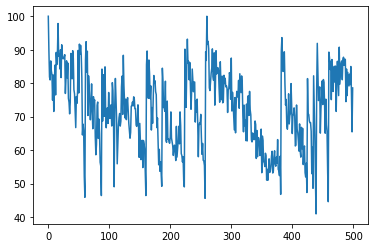

time: 164 ms


In [ ]:
plt.figure
plt.plot(range(0,OR_girl.shape[0]),OR_girl,'-')
print(np.average(OR_girl))
print(OR_girl.shape[0])

DOG1 Sequences

In [ ]:
# Initial frame and Gtruth
gt = np.loadtxt("/content/Dog1/groundtruth_rect.txt",delimiter=',',dtype=[('f0',int),('f1',int),('f2',int),('f3',int)])
pictureSequences = os.listdir('/content/Dog1/img')
url_1= "/content/Dog1/img/0001.jpg" 
firstFrame = cv2.imread(url_1)
width,heigh,_ = firstFrame.shape

# Recorded video
res=(heigh,width) #video resolution
fourcc = cv2.VideoWriter_fourcc(*'MP4V') #codec
video = cv2.VideoWriter('TrackingDog1.mp4', fourcc, 20.0, res)

imgCrop_ini = firstFrame[int(gt[0][1]):int(gt[0][1] + gt[0][3]), int(gt[0][0]):int(gt[0][0] + gt[0][2])]
h,w,channels = imgCrop_ini.shape # Measure heigh + width of croped 1st frame to find the 1st BB

# print(imgCrop_ini.reshape(-1).shape)
# cv2_imshow(imgCrop_ini)
# cv2_imshowAsd

imgCrop = imgCrop_ini
imgCrop = cv2.cvtColor(imgCrop,cv2.COLOR_BGR2GRAY)
boxedImage = []
i = 0 
OR_dog1 = np.array([])
cosine_collect = np.array([])

for each_image in sorted(pictureSequences):
  # Loading the processing images started from the 2nd file
  full_path = "/content/Dog1/img/" + each_image
  processingImage = cv2.imread(full_path)
  processingImage = cv2.cvtColor(processingImage,cv2.COLOR_BGR2GRAY)
  # cv2_imshow(processingImage)
  # Find correlation bw the previous image and current one
  findCorrelation = cv2.matchTemplate(processingImage,imgCrop,cv2.TM_CCOEFF_NORMED)
  promissingLocation = np.where(findCorrelation >= np.max(findCorrelation))
  h,w = imgCrop.shape

  pt = promissingLocation[::-1]
  # print(pt)
  temp = np.array([pt,(pt[0]+w,pt[1]+h)])
  # print(temp)
  boxedImage = cv2.imread(full_path)
  # Correlation Coefficient Tracking (Green) / (Blue)
  boxedImage = cv2.rectangle(boxedImage,pt,(pt[0]+w,pt[1]+h),(0,255,0),1)
  # Ground Truth (Yellow)
  boxedImage = cv2.rectangle(boxedImage,(gt[i][0],gt[i][1]),(gt[i][0] + gt[i][2],gt[i][1]+gt[i][3]),(0,255,255),1)
  # Calculate overlap region
  matchingRatio = calculateOR((gt[i][0],gt[i][1]),(gt[i][0] + gt[i][2],gt[i][1]+gt[i][3]),pt,(pt[0]+w,pt[1]+h))
  # print(matchingRatio)
  OR_dog1 = np.append(OR_dog1,matchingRatio)
  # make video
  video.write(boxedImage)
  
  processingImage = cv2.imread(full_path) #Reloading color images
  # Crop the image for the next processing loop
  imgCrop = processingImage[int(temp[0][1]):int(temp[1][1]), int(temp[0][0]):int(temp[1][0])] # remember x,y are fliped
  h,w,_ = imgCrop.shape #Measure heigh + width of croped 1st frame to find the 1st BB
  imgCrop = cv2.cvtColor(imgCrop,cv2.COLOR_BGR2GRAY)  
  
  if matchingRatio < 50:
    imgCrop = processingImage[int(gt[i][1]):int(gt[i][1]+gt[i][3]),int(gt[i][0]):int(gt[i][0] + gt[i][2])]
    imgCrop = cv2.cvtColor(imgCrop,cv2.COLOR_BGR2GRAY)
  
  i = i + 1

video.release()

time: 10.4 s


72.3857276568894
1350


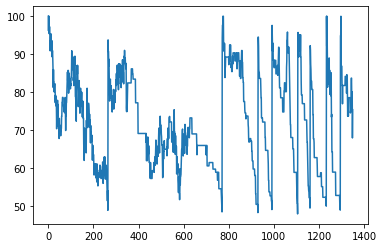

time: 165 ms


In [ ]:
plt.figure
plt.plot(range(0,OR_dog1.shape[0]),OR_dog1,'-')
print(np.average(OR_dog1))
print(OR_dog1.shape[0])

LIQUOR sequences

In [ ]:
# Initial frame and Gtruth
gt = np.loadtxt("/content/Liquor/groundtruth_rect.txt",delimiter=',',dtype=[('f0',int),('f1',int),('f2',int),('f3',int)])
pictureSequences = os.listdir('/content/Liquor/img')
url_1= "/content/Liquor/img/0001.jpg" 
firstFrame = cv2.imread(url_1)
width,heigh,_ = firstFrame.shape

# Recorded video
res=(heigh,width) #video resolution
fourcc = cv2.VideoWriter_fourcc(*'MP4V') #codec
video = cv2.VideoWriter('TrackingLiquor.mp4', fourcc, 20.0, res)

imgCrop_ini = firstFrame[int(gt[0][1]):int(gt[0][1] + gt[0][3]), int(gt[0][0]):int(gt[0][0] + gt[0][2])]
h,w,channels = imgCrop_ini.shape # Measure heigh + width of croped 1st frame to find the 1st BB

# print(imgCrop_ini.reshape(-1).shape)
# cv2_imshow(imgCrop_ini)
# cv2_imshowAsd

imgCrop = imgCrop_ini
imgCrop = cv2.cvtColor(imgCrop,cv2.COLOR_BGR2GRAY)
boxedImage = []
i = 0 
OR_Liquor = np.array([])
cosine_collect = np.array([])

for each_image in sorted(pictureSequences):
  # Loading the processing images started from the 2nd file
  full_path = "/content/Liquor/img/" + each_image
  processingImage = cv2.imread(full_path)
  processingImage = cv2.cvtColor(processingImage,cv2.COLOR_BGR2GRAY)
  # cv2_imshow(processingImage)
  # Find correlation bw the previous image and current one
  findCorrelation = cv2.matchTemplate(processingImage,imgCrop,cv2.TM_CCOEFF_NORMED)
  promissingLocation = np.where(findCorrelation >= np.max(findCorrelation))
  h,w = imgCrop.shape

  pt = promissingLocation[::-1]
  # print(pt)
  temp = np.array([pt,(pt[0]+w,pt[1]+h)])
  # print(temp)
  boxedImage = cv2.imread(full_path)
  # Correlation Coefficient Tracking (Green) / (Blue)
  boxedImage = cv2.rectangle(boxedImage,pt,(pt[0]+w,pt[1]+h),(0,255,0),1)
  # Ground Truth (Yellow)
  boxedImage = cv2.rectangle(boxedImage,(gt[i][0],gt[i][1]),(gt[i][0] + gt[i][2],gt[i][1]+gt[i][3]),(0,255,255),1)
  # Calculate overlap region
  matchingRatio = calculateOR((gt[i][0],gt[i][1]),(gt[i][0] + gt[i][2],gt[i][1]+gt[i][3]),pt,(pt[0]+w,pt[1]+h))
  # print(matchingRatio)
  OR_Liquor = np.append(OR_Liquor,matchingRatio)
  # make video
  video.write(boxedImage)
  
  processingImage = cv2.imread(full_path) #Reloading color images
# Crop the image for the next processing loop
  imgCrop = processingImage[int(temp[0][1]):int(temp[1][1]), int(temp[0][0]):int(temp[1][0])] # remember x,y are fliped
  h,w,_ = imgCrop.shape #Measure heigh + width of croped 1st frame to find the 1st BB
  imgCrop = cv2.cvtColor(imgCrop,cv2.COLOR_BGR2GRAY)

  if matchingRatio < 50:
    imgCrop = processingImage[int(gt[i][1]):int(gt[i][1]+gt[i][3]),int(gt[i][0]):int(gt[i][0] + gt[i][2])]
    imgCrop = cv2.cvtColor(imgCrop,cv2.COLOR_BGR2GRAY)
  

  i = i + 1

video.release()

time: 58.6 s


86.92771702458644
1741


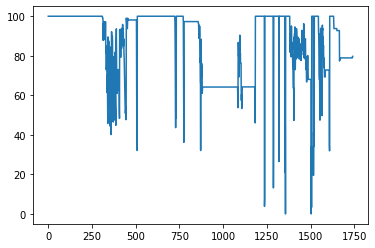

time: 162 ms


In [ ]:
plt.figure
plt.plot(range(0,OR_Liquor.shape[0]),OR_Liquor,'-')
print(np.average(OR_Liquor))
print(OR_Liquor.shape[0])

Freeman4 sequence

In [ ]:
# Initial frame and Gtruth
gt = np.loadtxt("/content/Freeman4/groundtruth_rect.txt",delimiter=',',dtype=[('f0',int),('f1',int),('f2',int),('f3',int)])
pictureSequences = os.listdir('/content/Freeman4/img')
url_1= "/content/Freeman4/img/0001.jpg" 
firstFrame = cv2.imread(url_1)
width,heigh,_ = firstFrame.shape

# Recorded video
res=(heigh,width) #video resolution
fourcc = cv2.VideoWriter_fourcc(*'MP4V') #codec
video = cv2.VideoWriter('TrackingFreeman4.mp4', fourcc, 20.0, res)

imgCrop_ini = firstFrame[int(gt[0][1]):int(gt[0][1] + gt[0][3]), int(gt[0][0]):int(gt[0][0] + gt[0][2])]
h,w,channels = imgCrop_ini.shape # Measure heigh + width of croped 1st frame to find the 1st BB

# print(imgCrop_ini.reshape(-1).shape)
# cv2_imshow(imgCrop_ini)
# cv2_imshowAsd

imgCrop = imgCrop_ini
imgCrop = cv2.cvtColor(imgCrop,cv2.COLOR_BGR2GRAY)
boxedImage = []
i = 0 
OR_Freeman4 = np.array([])
cosine_collect = np.array([])

for each_image in sorted(pictureSequences)[0:283]:
  # Loading the processing images started from the 2nd file
  full_path = "/content/Freeman4/img/" + each_image
  processingImage = cv2.imread(full_path)
  processingImage = cv2.cvtColor(processingImage,cv2.COLOR_BGR2GRAY)
  # cv2_imshow(processingImage)
  # Find correlation bw the previous image and current one
  findCorrelation = cv2.matchTemplate(processingImage,imgCrop,cv2.TM_CCOEFF_NORMED)
  promissingLocation = np.where(findCorrelation >= np.max(findCorrelation))
  h,w = imgCrop.shape

  pt = promissingLocation[::-1]
  # print(pt)
  temp = np.array([pt,(pt[0]+w,pt[1]+h)])
  # print(temp)
  boxedImage = cv2.imread(full_path)
  # Correlation Coefficient Tracking (Green) / (Blue)
  boxedImage = cv2.rectangle(boxedImage,pt,(pt[0]+w,pt[1]+h),(0,255,0),1)
  # Ground Truth (Yellow)
  boxedImage = cv2.rectangle(boxedImage,(gt[i][0],gt[i][1]),(gt[i][0] + gt[i][2],gt[i][1]+gt[i][3]),(0,255,255),1)
  # Calculate overlap region
  matchingRatio = calculateOR((gt[i][0],gt[i][1]),(gt[i][0] + gt[i][2],gt[i][1]+gt[i][3]),pt,(pt[0]+w,pt[1]+h))
  # print(matchingRatio)

  OR_Freeman4 = np.append(OR_Freeman4,matchingRatio)
  # make video
  video.write(boxedImage)
  
  processingImage = cv2.imread(full_path) #Reloading color images
  
  # Crop the image for the next processing loop
  imgCrop = processingImage[int(temp[0][1]):int(temp[1][1]), int(temp[0][0]):int(temp[1][0])] # remember x,y are fliped
  h,w,_ = imgCrop.shape #Measure heigh + width of croped 1st frame to find the 1st BB
  imgCrop = cv2.cvtColor(imgCrop,cv2.COLOR_BGR2GRAY)

  if matchingRatio < 50:
    imgCrop = processingImage[int(gt[i][1]):int(gt[i][1]+gt[i][3]),int(gt[i][0]):int(gt[i][0] + gt[i][2])]
    imgCrop = cv2.cvtColor(imgCrop,cv2.COLOR_BGR2GRAY)

  i = i + 1

video.release()

time: 2.69 s


7.216738515064817
283


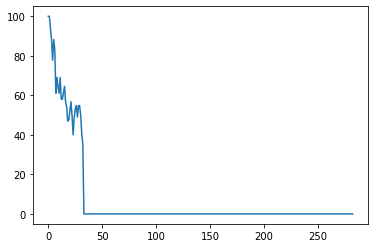

time: 153 ms


In [ ]:
plt.figure
plt.plot(range(0,OR_Freeman4.shape[0]),OR_Freeman4,'-')
print(np.average(OR_Freeman4))
print(OR_Freeman4.shape[0])


FaceOcc2 sequences

In [ ]:
# Initial frame and Gtruth
gt = np.loadtxt("/content/FaceOcc2/groundtruth_rect.txt",delimiter=',',dtype=[('f0',int),('f1',int),('f2',int),('f3',int)])
pictureSequences = os.listdir('/content/FaceOcc2/img')
url_1= "/content/FaceOcc2/img/0001.jpg" 
firstFrame = cv2.imread(url_1)
width,heigh,_ = firstFrame.shape

# Recorded video
res=(heigh,width) #video resolution
fourcc = cv2.VideoWriter_fourcc(*'MP4V') #codec
video = cv2.VideoWriter('TrackingFaceOcc2.mp4', fourcc, 20.0, res)

imgCrop_ini = firstFrame[int(gt[0][1]):int(gt[0][1] + gt[0][3]), int(gt[0][0]):int(gt[0][0] + gt[0][2])]
h,w,channels = imgCrop_ini.shape # Measure heigh + width of croped 1st frame to find the 1st BB

# print(imgCrop_ini.reshape(-1).shape)
# cv2_imshow(imgCrop_ini)
# cv2_imshowAsd

imgCrop = imgCrop_ini
imgCrop = cv2.cvtColor(imgCrop,cv2.COLOR_BGR2GRAY)
boxedImage = []
i = 0 
OR_FaceOcc2 = np.array([])
cosine_collect = np.array([])

for each_image in sorted(pictureSequences):
  # Loading the processing images started from the 2nd file
  full_path = "/content/FaceOcc2/img/" + each_image
  processingImage = cv2.imread(full_path)
  processingImage = cv2.cvtColor(processingImage,cv2.COLOR_BGR2GRAY)
  # cv2_imshow(processingImage)
  # Find correlation bw the previous image and current one
  findCorrelation = cv2.matchTemplate(processingImage,imgCrop,cv2.TM_CCOEFF_NORMED)
  promissingLocation = np.where(findCorrelation >= np.max(findCorrelation))
  h,w = imgCrop.shape
 
  pt = promissingLocation[::-1]
  # print(pt)
  temp = np.array([pt,(pt[0]+w,pt[1]+h)])
  # print(temp)
  boxedImage = cv2.imread(full_path)
  # Correlation Coefficient Tracking (Green) / (Blue)
  boxedImage = cv2.rectangle(boxedImage,pt,(pt[0]+w,pt[1]+h),(0,255,0),1)
  # Ground Truth (Yellow)
  boxedImage = cv2.rectangle(boxedImage,(gt[i][0],gt[i][1]),(gt[i][0] + gt[i][2],gt[i][1]+gt[i][3]),(0,255,255),1)
  # Calculate overlap region
  matchingRatio = calculateOR((gt[i][0],gt[i][1]),(gt[i][0] + gt[i][2],gt[i][1]+gt[i][3]),pt,(pt[0]+w,pt[1]+h))
  # print(matchingRatio)

  OR_FaceOcc2 = np.append(OR_FaceOcc2,matchingRatio)
  # make video
  video.write(boxedImage)
  
  processingImage = cv2.imread(full_path) #Reloading color images
  # Crop the image for the next processing loop
  imgCrop = processingImage[int(temp[0][1]):int(temp[1][1]), int(temp[0][0]):int(temp[1][0])] # remember x,y are fliped
  h,w,_ = imgCrop.shape #Measure heigh + width of croped 1st frame to find the 1st BB
  imgCrop = cv2.cvtColor(imgCrop,cv2.COLOR_BGR2GRAY)
  
  if matchingRatio < 50:
    imgCrop = processingImage[int(gt[i][1]):int(gt[i][1]+gt[i][3]),int(gt[i][0]):int(gt[i][0] + gt[i][2])]
    imgCrop = cv2.cvtColor(imgCrop,cv2.COLOR_BGR2GRAY)

  i = i + 1

video.release()

time: 5.69 s


74.54028263618532
812


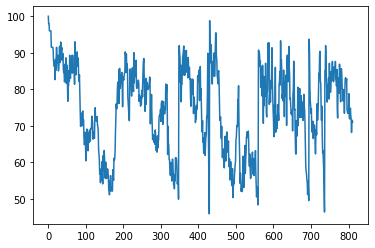

time: 167 ms


In [ ]:
plt.figure
plt.plot(range(0,OR_FaceOcc2.shape[0]),OR_FaceOcc2,'-')
print(np.average(OR_FaceOcc2))
print(OR_FaceOcc2.shape[0])

In [ ]:
print(OR_FaceOcc2.shape[0])
print(OR_dog1.shape[0])
print(OR_Freeman4.shape[0])
print(OR_girl.shape[0])
print(OR_Liquor.shape[0])

extended_FaceOcc2 = np.ones(OR_Liquor.shape[0]-OR_FaceOcc2.shape[0])*np.average(OR_FaceOcc2)
OR_FaceOcc2 = np.append(OR_FaceOcc2,extended_FaceOcc2)

extended_dog1 = np.ones(OR_Liquor.shape[0]-OR_dog1.shape[0])*np.average(OR_dog1)
OR_dog1 = np.append(OR_dog1,extended_dog1)

extended_Freeman4 = np.ones(OR_Liquor.shape[0]-OR_Freeman4.shape[0])*np.average(OR_Freeman4)
OR_Freeman4 = np.append(OR_Freeman4,extended_Freeman4)

extended_girl1 = np.ones(OR_Liquor.shape[0]-OR_girl.shape[0])*np.average(OR_girl)
OR_girl = np.append(OR_girl,extended_girl1)


812
1350
283
500
1741
time: 9.58 ms


In [ ]:
plt.figure
plt.plot(range(0,OR_FaceOcc2.shape[0]),OR_FaceOcc2,'-', label="FaceOcc2")
print(np.average(OR_FaceOcc2))
# plt.figure
plt.plot(range(0,OR_dog1.shape[0]),OR_dog1,'-',label="Dog1")
print(np.average(OR_dog1))
# plt.figure
plt.plot(range(0,OR_Freeman4.shape[0]),OR_Freeman4,'-',label="Freeman4")
print(np.average(OR_Freeman4))
# plt.figure
plt.plot(range(0,OR_girl.shape[0]),OR_girl,'-',label="Girl")
print(np.average(OR_girl))
# plt.figure
plt.plot(range(0,OR_Liquor.shape[0]),OR_Liquor,'-',label="Liquor")
print(np.average(OR_Liquor))

avg = (np.average(OR_FaceOcc2) +np.average(OR_dog1) + np.average(OR_Freeman4) + np.average(OR_girl) +np.average(OR_Liquor))/5
print(avg)
avg = np.ones(OR_Liquor.shape[0])*avg
plt.plot(range(0,OR_Liquor.shape[0]),avg,'-',label="Average")


plt.title("Tracking Accuracy of 5 Video Sequences without OR Correction")
plt.xlabel("Frames")
plt.ylabel("Overlap Ratio")
plt.legend(loc="upper right")

